# Model 2: Part I

### Ordinary least square $R_{i,t}=\alpha_i+\beta_i R_mt+\epsilon_{i,t}$

In [61]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from itertools import product
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [57]:
df = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\AR_Data.xlsx',sheet_name='Window',header=0) 
df.columns = ['trading_day','china_T','china_R','china_E','singapore_T','singapore_R','singapore_E','USA_T','USA_R','USA_E',
              'china_m','singapore_m','USA_m']
df.head(5)

,trading_day,china_T,china_R,china_E,singapore_T,singapore_R,singapore_E,USA_T,USA_R,USA_E,china_m,singapore_m,USA_m
0,-180,-0.056517,-0.502433,1.780985,-0.539132,3.176144,-1.082706,0.659351,0.448867,0.090542,0.283969,-0.003770,-0.123475
1,-179,2.095507,1.403457,-1.724843,-0.840562,-1.499636,-0.677969,1.286207,1.351527,0.561538,0.329684,-0.706828,0.381592
2,-178,-7.368238,-5.592526,-3.577366,0.639820,0.022549,0.677969,1.477603,0.653104,0.314938,-6.019061,0.289704,0.574091
3,-177,1.066983,2.131899,0.702696,-0.227412,0.834476,0.785198,0.419213,0.038539,0.879640,0.973636,0.027757,0.764300
4,-176,-1.407176,-0.674911,-2.850779,0.227412,2.105496,0.557105,-0.816868,-0.788687,0.479407,-1.440444,-0.172030,0.292387


In [58]:
print(df.describe())
print(df.columns) # 查看原数据集中数据的类别，便于接下来的操作
df.shape

       trading_day     china_T     china_R     china_E  singapore_T  singapore_R   singapore_E       USA_T       USA_R       USA_E     china_m  singapore_m       USA_m
count   215.000000  215.000000  215.000000  215.000000   215.000000   215.000000  2.150000e+02  215.000000  215.000000  215.000000  215.000000   215.000000  215.000000
mean    -73.000000   -0.103922   -0.071592    0.014026    -0.186435    -0.225829 -1.542245e-01   -0.100525   -0.071165   -0.019654   -0.021989    -0.114699   -0.014027
std      62.209324    1.425419    1.231900    1.787826     1.643982     1.954265  1.404969e+00    2.458837    2.548957    1.980356    1.346095     1.281791    2.199327
min    -180.000000   -9.609919   -5.729436   -9.444472    -9.662479   -11.080465 -7.627767e+00  -12.258458  -13.256669  -11.717509   -8.208697    -7.637285  -12.765214
25%    -126.500000   -0.675296   -0.706886   -0.882742    -0.581051    -0.887821 -5.130096e-01   -0.758429   -0.966364   -0.516456   -0.540195    -0.497914   -0

(215, 13)

In [59]:
data = df.set_index('trading_day')
estimate = data.loc[:-1]
event = data.loc[0:]
estimate.tail()

,china_T,china_R,china_E,singapore_T,singapore_R,singapore_E,USA_T,USA_R,USA_E,china_m,singapore_m,USA_m
trading_day,,,,,,,,,,,,
-5,-0.167968,-0.096347,-1.360671,-0.434844,-0.711006,-0.445270,-0.610678,-1.096392,-0.894068,-0.335959,-0.536020,-1.720100
-4,-0.884264,-0.318971,-0.483044,-1.532311,-0.959407,-0.709090,-10.250669,-5.631442,-6.184948,-0.554293,-1.193627,-7.901039
-3,-0.698161,-0.726543,0.317297,0.197526,0.851950,0.149701,5.269122,1.811197,4.670128,-0.425457,1.283639,4.821508
-2,-0.136968,-0.805665,-0.207475,0.178379,1.326984,0.930586,-4.743505,-7.502339,-5.417322,0.139934,1.370544,-5.010286
-1,-0.327544,0.445478,-4.440342,2.446152,1.571770,0.885288,-11.283504,-13.090097,-10.352798,0.742869,0.977046,-9.994485


$\textbf{ China transportation and retail} $

In [52]:
from sklearn.linear_model import LinearRegression

Tran_y_train = estimate[:135].china_T.values.reshape(-1,1) 
X_train = estimate[:135].china_m.values.reshape(-1,1)
Tran_y_test = estimate[135:].china_T.values.reshape(-1,1)
X_test = estimate[135:].china_m.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Tran_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Tran_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Tran_y_test, Tran_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Tran_y_test, Tran_y_pred))

residuals = np.array(estimate.china_T.values.reshape(-1,1) ) - regr.predict(estimate.china_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.08454191] [[1.02066125]]
Mean squared error: 0.1822
Coefficient of determination: 0.702
Residuals error: 0.2771


In [7]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model_T = sm.OLS(Tran_y_train,X).fit()
model_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     599.1
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           4.23e-51
Time:                        16:11:23   Log-Likelihood:                -112.24
No. Observations:                 135   AIC:                             228.5
Df Residuals:                     133   BIC:                             234.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0845      0.048     -1.755      0.082      -0.180       0.011
x1             1.0207      0.042     24.476      0.000       0.938       1.103
==============================================================================
Omnibus:                       15.904   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.959
Skew:                           0.510   Prob(JB):                     3.12e-07
Kurtosis:                       5.070   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
Retail_y_train = estimate[:135].china_R.values.reshape(-1,1) 
Retail_y_test = estimate[135:].china_R.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Retail_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Retail_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Retail_y_test, Retail_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Retail_y_test, Retail_y_pred))

residuals = np.array(estimate.china_R.values.reshape(-1,1) ) - regr.predict(estimate.china_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.1144599] [[0.88616088]]
Mean squared error: 0.2042
Coefficient of determination: 0.592
Residuals error: 0.2726


In [9]:
X = sm.add_constant(X_train)
model_R = sm.OLS(Retail_y_train,X).fit()
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     470.3
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           1.67e-45
Time:                        16:11:36   Log-Likelihood:                -109.50
No. Observations:                 135   AIC:                             223.0
Df Residuals:                     133   BIC:                             228.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1145      0.047     -2.424      0.017      -0.208      -0.021
x1             0.8862      0.041     21.686      0.000       0.805       0.967
==============================================================================
Omnibus:                        4.272   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.950
Skew:                           0.416   Prob(JB):                        0.139
Kurtosis:                       3.094   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

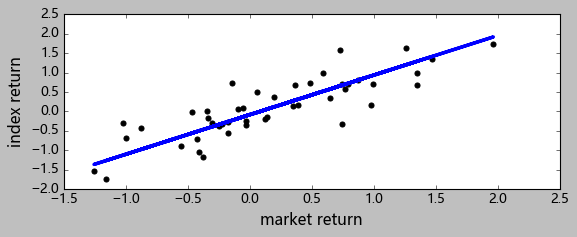

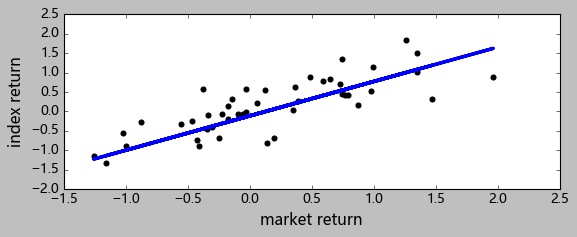

In [10]:
plt.subplot(211)
plt.scatter(X_test, Tran_y_test,  color='black')
plt.plot(X_test, Tran_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

plt.subplot(212)
plt.scatter(X_test, Retail_y_test,  color='black')
plt.plot(X_test, Retail_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

$\textbf{ USA transportation and retail} $

In [62]:
Tran_y_train = estimate[:135].USA_T.values.reshape(-1,1) 
X_train = estimate[:135].USA_m.values.reshape(-1,1)
Tran_y_test = estimate[135:].USA_T.values.reshape(-1,1)
X_test = estimate[135:].USA_m.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Tran_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Tran_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Tran_y_test, Tran_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Tran_y_test, Tran_y_pred))

residuals = np.array(estimate.USA_T.values.reshape(-1,1) ) - regr.predict(estimate.USA_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.03900785] [[1.21870244]]
Mean squared error: 1.1511
Coefficient of determination: 0.864
Residuals error: 0.7021


In [14]:
X = sm.add_constant(X_train)
model_T = sm.OLS(Tran_y_train,X).fit()
model_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.23e-29
Time:                        21:44:54   Log-Likelihood:                -151.70
No. Observations:                 135   AIC:                             307.4
Df Residuals:                     133   BIC:                             313.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0390      0.065     -0.601      0.549      -0.167       0.089
x1             1.2187      0.084     14.521      0.000       1.053       1.385
==============================================================================
Omnibus:                        8.487   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               17.567
Skew:                           0.026   Prob(JB):                     0.000153
Kurtosis:                       4.766   Cond. No.                         1.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
Retail_y_train = estimate[:135].USA_R.values.reshape(-1,1) 
Retail_y_test = estimate[135:].USA_R.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Retail_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Retail_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Retail_y_test, Retail_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Retail_y_test, Retail_y_pred))

residuals = np.array(estimate.USA_R.values.reshape(-1,1) ) - regr.predict(estimate.USA_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.02988456] [[1.2433842]]
Mean squared error: 2.1283
Coefficient of determination: 0.710
Residuals error: 1.1683


In [16]:
X = sm.add_constant(X_train)
model_R = sm.OLS(Retail_y_train,X).fit()
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.47e-23
Time:                        21:44:58   Log-Likelihood:                -180.53
No. Observations:                 135   AIC:                             365.1
Df Residuals:                     133   BIC:                             370.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0299      0.080     -0.372      0.710      -0.189       0.129
x1             1.2434      0.104     11.967      0.000       1.038       1.449
==============================================================================
Omnibus:                        9.459   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.815
Skew:                           0.472   Prob(JB):                      0.00448
Kurtosis:                       4.016   Cond. No.                         1.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
Enter_y_train = estimate[:135].USA_E.values.reshape(-1,1) 
Enter_y_test = estimate[135:].USA_E.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Enter_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Enter_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Enter_y_test, Enter_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Enter_y_test, Enter_y_pred))

residuals = np.array(estimate.USA_E.values.reshape(-1,1) ) - regr.predict(estimate.USA_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.03242884] [[0.95119105]]
Mean squared error: 0.2610
Coefficient of determination: 0.957
Residuals error: 0.1299


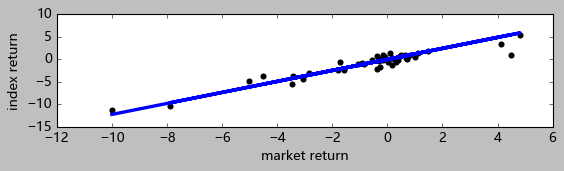

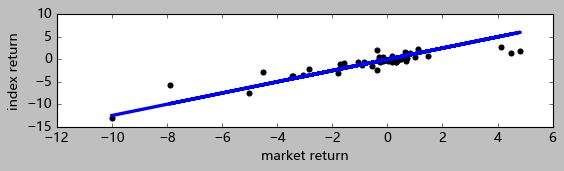

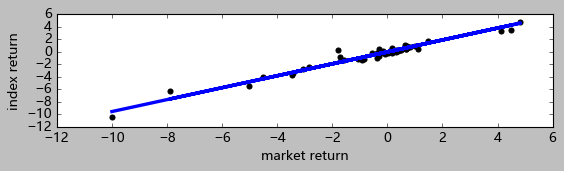

In [65]:
plt.subplot(311)
plt.scatter(X_test, Tran_y_test,  color='black')
plt.plot(X_test, Tran_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

plt.subplot(312)
plt.scatter(X_test, Retail_y_test,  color='black')
plt.plot(X_test, Retail_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

plt.subplot(313)
plt.scatter(X_test, Enter_y_test,  color='black')
plt.plot(X_test, Enter_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

$\textbf{ Singapore transportation and retail} $

In [76]:
Tran_y_train = estimate[:135].singapore_T.values.reshape(-1,1) 
X_train = estimate[:135].singapore_m.values.reshape(-1,1)
Tran_y_test = estimate[135:].singapore_T.values.reshape(-1,1)
X_test = estimate[135:].singapore_m.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Tran_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Tran_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Tran_y_test, Tran_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Tran_y_test, Tran_y_pred))

residuals = np.array(estimate.singapore_T.values.reshape(-1,1) ) - regr.predict(estimate.singapore_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [0.00685245] [[0.74543373]]
Mean squared error: 0.4160
Coefficient of determination: 0.471
Residuals error: 0.3890


In [126]:
X = sm.add_constant(X_train)
model_T = sm.OLS(Tran_y_train,X).fit()
model_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     72.79
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.83e-14
Time:                        22:11:28   Log-Likelihood:                -126.68
No. Observations:                 135   AIC:                             257.4
Df Residuals:                     133   BIC:                             263.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.054      0.128      0.899      -0.099       0.113
x1             0.7454      0.087      8.532      0.000       0.573       0.918
==============================================================================
Omnibus:                       18.408   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.410
Skew:                           0.135   Prob(JB):                     3.46e-18
Kurtosis:                       6.771   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
Retail_y_train = estimate[:135].singapore_R.values.reshape(-1,1) 
Retail_y_test = estimate[135:].singapore_R.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Retail_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Retail_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Retail_y_test, Retail_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Retail_y_test, Retail_y_pred))

residuals = np.array(estimate.singapore_R.values.reshape(-1,1) ) - regr.predict(estimate.singapore_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [-0.0826773] [[1.24654893]]
Mean squared error: 0.4678
Coefficient of determination: 0.554
Residuals error: 0.6531


In [128]:
X = sm.add_constant(X_train)
model_R = sm.OLS(Retail_y_train,X).fit()
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           5.42e-19
Time:                        22:12:53   Log-Likelihood:                -168.91
No. Observations:                 135   AIC:                             341.8
Df Residuals:                     133   BIC:                             347.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0827      0.073     -1.128      0.261      -0.228       0.062
x1             1.2465      0.119     10.435      0.000       1.010       1.483
==============================================================================
Omnibus:                       10.636   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.455
Skew:                           0.384   Prob(JB):                     0.000267
Kurtosis:                       4.528   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
Enter_y_train = estimate[:135].singapore_E.values.reshape(-1,1) 
Enter_y_test = estimate[135:].singapore_E.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train, Enter_y_train)
print('Coefficients: \n', regr.intercept_, regr.coef_)

Enter_y_pred = regr.predict(X_test)
print('Mean squared error: %.4f' %mean_squared_error(Enter_y_test, Enter_y_pred))
print('Coefficient of determination: %.3f' %r2_score(Enter_y_test, Enter_y_pred))

residuals = np.array(estimate.singapore_E.values.reshape(-1,1) ) - regr.predict(estimate.singapore_m.values.reshape(-1,1))
var = np.var(residuals)
print('Residuals error: %.4f' %var)

Coefficients: 
 [0.04856129] [[0.59657735]]
Mean squared error: 0.3498
Coefficient of determination: 0.442
Residuals error: 0.2786


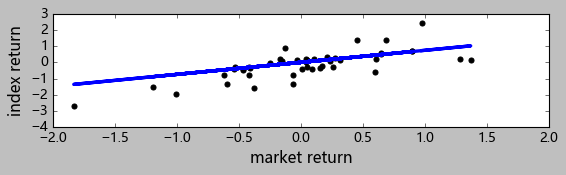

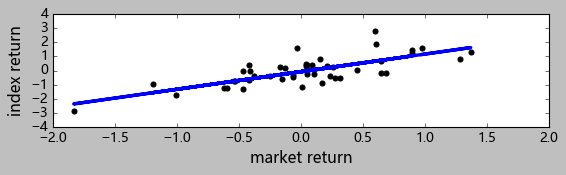

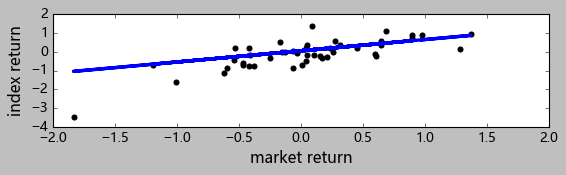

In [79]:
plt.subplot(311)
plt.scatter(X_test, Tran_y_test,  color='black')
plt.plot(X_test, Tran_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

plt.subplot(312)
plt.scatter(X_test, Retail_y_test,  color='black')
plt.plot(X_test, Retail_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

plt.subplot(313)
plt.scatter(X_test, Enter_y_test,  color='black')
plt.plot(X_test, Enter_y_pred, color='blue', linewidth=3)
plt.xlabel('market return')
plt.ylabel('index return')
plt.show()

# Model 2: Part 2

## Empirical Results of Event Study

$\textbf{ China } $

In [11]:
AR = pd.DataFrame(index=event.index)

Tran_return = event.china_T.values.reshape(-1,1)
Tran_return_pre = regr.predict(event.china_m.values.reshape(-1,1))
Tran_AR = pd.DataFrame(Tran_return - Tran_return_pre,index=event.index)

Retail_return = event.china_R.values.reshape(-1,1)
Retail_return_pre = regr.predict(event.china_m.values.reshape(-1,1))
Retail_AR = pd.DataFrame(Retail_return - Retail_return_pre)

AR['Tran_AR'] = Tran_AR
AR['Retail_AR'] = Retail_AR

writer1 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_AR.xlsx')
AR.to_excel(writer1, 'China_AR')
writer1.save()
writer1.close()

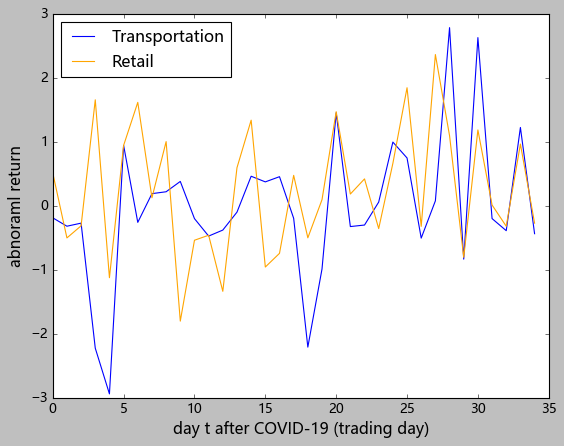

In [108]:
plt.plot(AR.Tran_AR, label='Transportation',color='blue')
plt.plot(AR.Retail_AR, label='Retail',color='orange')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('abnoraml return')
plt.legend(loc=2)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_AR.png')
plt.show()

In [13]:
CAR = pd.DataFrame(index=event.index)

CAR['Transportation'] = np.cumsum(Tran_AR)
CAR['Retail'] = np.cumsum(Retail_AR)

writer2 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_CAR.xlsx')
CAR.to_excel(writer2, 'China_CAR')
writer2.save()
writer2.close()

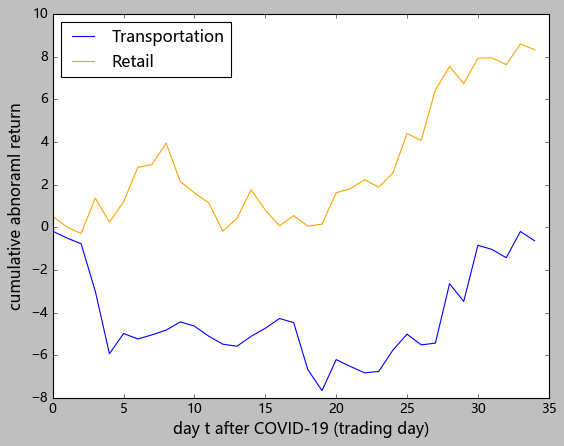

In [109]:
plt.plot(CAR.Transportation, label='Transportation',color='blue')
plt.plot(CAR.Retail, label='Retail',color='orange')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('cumulative abnoraml return')
plt.legend(loc=2)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_CAR.png')
plt.show()

$\textbf{ USA } $

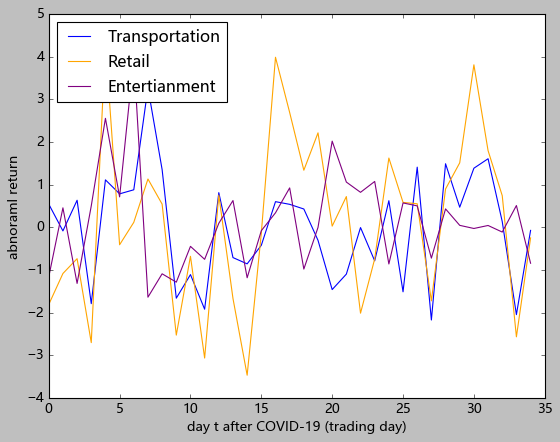

In [66]:
AR = pd.DataFrame(index=event.index)

Tran_return = event.USA_T.values.reshape(-1,1)
Tran_return_pre = regr.predict(event.USA_m.values.reshape(-1,1))
Tran_AR = pd.DataFrame(Tran_return - Tran_return_pre,index=event.index)

Retail_return = event.USA_R.values.reshape(-1,1)
Retail_return_pre = regr.predict(event.USA_m.values.reshape(-1,1))
Retail_AR = pd.DataFrame(Retail_return - Retail_return_pre)

Enter_return = event.USA_E.values.reshape(-1,1)
Enter_return_pre = regr.predict(event.USA_m.values.reshape(-1,1))
Enter_AR = pd.DataFrame(Enter_return - Enter_return_pre)

AR['Tran_AR'] = Tran_AR
AR['Retail_AR'] = Retail_AR
AR['Enter_AR'] = Enter_AR

writer1 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_AR.xlsx')
AR.to_excel(writer1, 'USA_AR')
writer1.save()
writer1.close()

plt.plot(AR.Tran_AR, label='Transportation',color='blue')
plt.plot(AR.Retail_AR, label='Retail',color='orange')
plt.plot(AR.Enter_AR, label='Entertianment',color='purple')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('abnoraml return')
plt.legend(loc=2)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_AR.png')
plt.show()

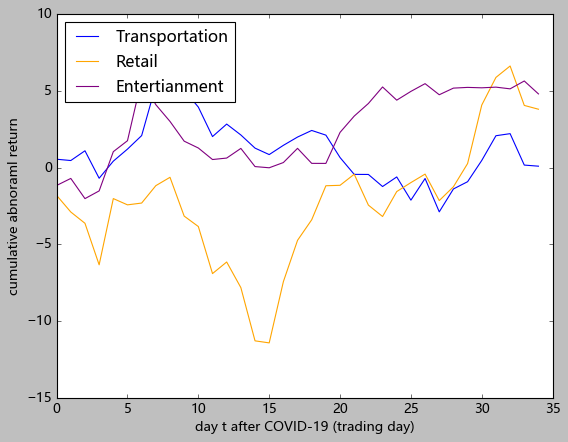

In [67]:
CAR = pd.DataFrame(index=event.index)

CAR['Transportation'] = np.cumsum(Tran_AR)
CAR['Retail'] = np.cumsum(Retail_AR)
CAR['Enter'] = np.cumsum(Enter_AR)

writer2 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_CAR.xlsx')
CAR.to_excel(writer2, 'USA_CAR')
writer2.save()
writer2.close()

plt.plot(CAR.Transportation, label='Transportation',color='blue')
plt.plot(CAR.Retail, label='Retail',color='orange')
plt.plot(CAR.Enter, label='Entertianment',color='purple')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('cumulative abnoraml return')
plt.legend(loc=2)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_CAR.png')
plt.show()

$\textbf{ Singapore } $

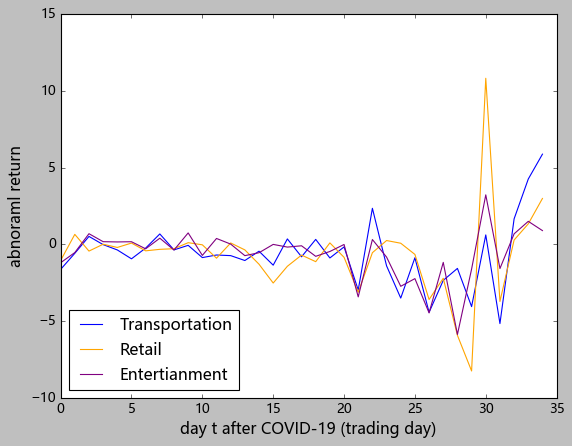

In [83]:
AR = pd.DataFrame(index=event.index)

Tran_return = event.singapore_T.values.reshape(-1,1)
Tran_return_pre = regr.predict(event.singapore_m.values.reshape(-1,1))
Tran_AR = pd.DataFrame(Tran_return - Tran_return_pre,index=event.index)

Retail_return = event.singapore_R.values.reshape(-1,1)
Retail_return_pre = regr.predict(event.singapore_m.values.reshape(-1,1))
Retail_AR = pd.DataFrame(Retail_return - Retail_return_pre)

Enter_return = event.singapore_E.values.reshape(-1,1)
Enter_return_pre = regr.predict(event.singapore_m.values.reshape(-1,1))
Enter_AR = pd.DataFrame(Enter_return - Enter_return_pre)

AR['Tran_AR'] = Tran_AR
AR['Retail_AR'] = Retail_AR
AR['Enter_AR'] = Enter_AR

writer1 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_AR.xlsx')
AR.to_excel(writer1, 'Singapore_AR')
writer1.save()
writer1.close()

plt.plot(AR.Tran_AR, label='Transportation',color='blue')
plt.plot(AR.Retail_AR, label='Retail',color='orange')
plt.plot(AR.Enter_AR, label='Entertianment',color='purple')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('abnoraml return')
plt.legend(loc=3)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_AR.png')
plt.show()

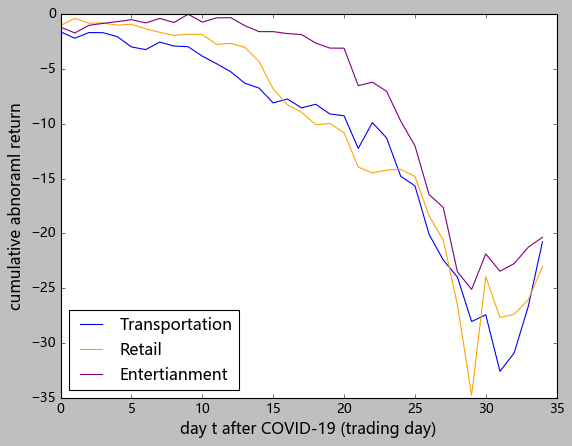

In [82]:
CAR = pd.DataFrame(index=event.index)

CAR['Transportation'] = np.cumsum(Tran_AR)
CAR['Retail'] = np.cumsum(Retail_AR)
CAR['Enter'] = np.cumsum(Enter_AR)

writer2 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_CAR.xlsx')
CAR.to_excel(writer2, 'Singapore_CAR')
writer2.save()
writer2.close()

plt.plot(CAR.Transportation, label='Transportation',color='blue')
plt.plot(CAR.Retail, label='Retail',color='orange')
plt.plot(CAR.Enter, label='Entertianment',color='purple')
plt.xlabel('day t after COVID-19 (trading day)')
plt.ylabel('cumulative abnoraml return')
plt.legend(loc=3)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_CAR.png')
plt.show()

### H0: The COVID outbreak had no impact on stock price

In [68]:
import warnings
warnings.filterwarnings("ignore")
from itertools import product
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

$\textbf{A single event: CAR}$ $\textbf{ for Daily Cumulative}$

In [33]:
import ESM as es # 这是别人开发的API https://github.com/LemaireJean-Baptiste/eventstudy

es.Single.import_returns(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\China_ESM_Data.csv')

In [34]:
COVID_T = es.Single.market_model(
    security_ticker = 'Transportation',
    market_ticker = 'China',
    event_date = np.datetime64('2020-01-21'),
    event_window = (-5,+34), 
    estimation_size = 200,
    buffer_size = 30
)

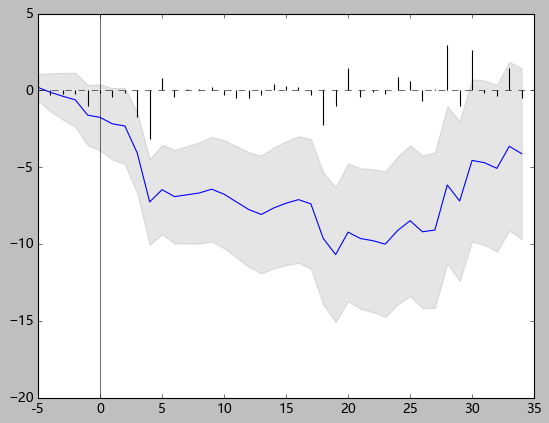

In [35]:
COVID_T.plot(AR=True)
plt.show()

In [37]:
outputpath= r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_Tran_t_Test.csv' 
COVID_T.results(decimals=[3,5,3,5,4,4]).to_csv(outputpath,sep=',',index='trading day',header=True) 
COVID_T.results(decimals=[3,5,3,5,4,4])

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-5,0.190,0.46848,0.19,0.46848,0.2775,0.3908
-4,-0.319,0.46848,-0.129,0.93696,-0.1331,0.4471
-3,-0.255,0.46848,-0.384,1.40545,-0.3239,0.3732
-2,-0.232,0.46848,-0.616,1.87393,-0.4497,0.3267
-1,-0.996,0.46848,-1.611,2.34241,-1.0528,0.1469
0,-0.149,0.46848,-1.76,2.81089,-1.0499,0.1475
1,-0.420,0.46848,-2.18,3.27937,-1.2038,0.1151
2,-0.140,0.46848,-2.32,3.74785,-1.1982,0.1161
3,-1.765,0.46848,-4.085 **,4.21634,-1.9892,0.0240
4,-3.181,0.46848,-7.265 ***,4.68482,-3.3567,0.0005


In [15]:
COVID_R = es.Single.market_model(
    security_ticker = 'Retail',
    market_ticker = 'China',
    event_date = np.datetime64('2020-01-21'),
    event_window = (-5,+34), 
    estimation_size = 200,
    buffer_size = 30
)

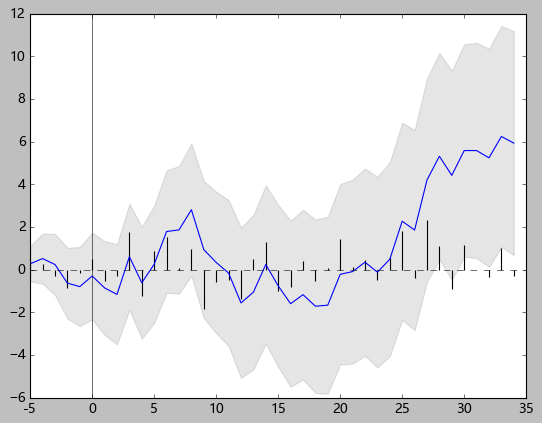

In [16]:
COVID_R.plot(AR=True)
plt.show()

In [18]:
outputpath= r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_Retail_t_Test.csv' 
COVID_R.results(decimals=[3,5,3,5,4,4]).to_csv(outputpath,sep=',',index='trading day',header=True) 
#COVID_R.results(decimals=[3,5,3,5,4,4])

$ \textbf{CAR}$ $\textbf{ Z / t-statistic test in different event window}$

In [43]:
from scipy.stats import norm
from scipy.stats import t

#df1 = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\China_Test_Data.xlsx',sheet_name='China_AR',header=0) 
df1 = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\China_Test_Data.xlsx',sheet_name='China_AR',header=0) 
df1.columns = ['trading_day','transportation','ratail','market','SAR_T','SAR_R','window']

data1 = df1.set_index('trading_day')
data1.tail()

,transportation,ratail,market,SAR_T,SAR_R,window
trading_day,,,,,,
30,2.631266,1.188287,-0.572255,2.361919,1.215879,31
31,-0.196559,0.015671,2.258045,-0.174449,0.015854,32
32,-0.385582,-0.316387,-0.466593,-0.346145,-0.323765,33
33,1.227153,0.968087,0.329322,1.100995,0.990079,34
34,-0.432782,-0.268018,-0.624970,-0.388456,-0.274224,35


In [44]:
Adj_CAR = pd.DataFrame(index=data1.index)

window = data1.window.values
CAR_T = np.cumsum(data1.SAR_T.values) # 这个检验统计量SAR的计算在excel中完成
CAR_R = np.cumsum(data1.SAR_R.values)

normstat_T = CAR_T/np.sqrt(window)
normstat_R = CAR_R/np.sqrt(window)
#pvalue_T = pd.DataFrame(1.0 - norm.cdf(abs(normstat_T), loc=0, scale=1), index=data1.index) # 检验统计量是标准正态分布 On corporate governance a study of proxy contests
#pvalue_R = pd.DataFrame(1.0 - norm.cdf(abs(normstat_R), loc=0, scale=1), index=data1.index)
pvalue_T = pd.DataFrame(1.0 - t.cdf(abs(normstat_T), 133), index=data1.index) # 检验统计量是t-student 自由度很大情况下就是标准正态
pvalue_R = pd.DataFrame(1.0 - t.cdf(abs(normstat_R), 133), index=data1.index)
Tran_A_CAR = pd.DataFrame(normstat_T, index=data1.index)
Retail_A_CAR = pd.DataFrame(normstat_R,index=data1.index)

Adj_CAR['Tran_Adj_CAR'] = Tran_A_CAR
Adj_CAR['Tran_P'] = pvalue_T
Adj_CAR['Retail_Adj_CAR'] = Retail_A_CAR
Adj_CAR['Retail_P'] = pvalue_R
writer3 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_t_Test.xlsx')
Adj_CAR.to_excel(writer3, 'China_Adj_CAR')
writer3.save()
writer3.close()

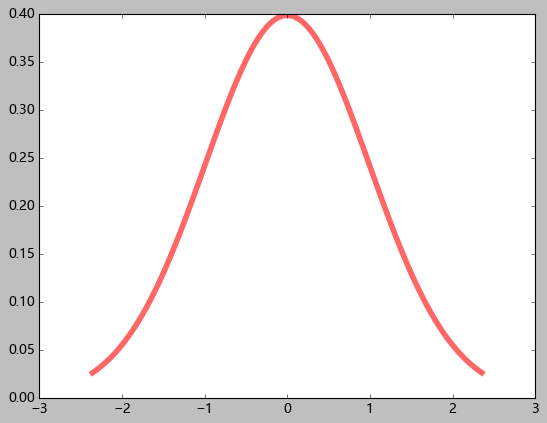

In [46]:
df = 133
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.show()

In [32]:
pvalue = 1.0 - norm.cdf(abs(-1.778372927),loc=0, scale=1) # 修改每一个窗口期算出来的CAR数值
pvalue

0.03767131303989735

In [43]:
pvalue = 1.0 - norm.cdf(abs(-0.112375685),loc=0, scale=1) 
pvalue

0.4552627668764835

In [44]:
pvalue = 1.0 - norm.cdf(abs(-0.217),loc=0, scale=1) 
pvalue

0.4141041724696519

In [45]:
pvalue = 1.0 - norm.cdf(abs(-0.264),loc=0, scale=1) 
pvalue

0.3958899593755876

In [46]:
pvalue = 1.0 - norm.cdf(abs(1.631),loc=0, scale=1) 
pvalue

0.05144515975504316

$\textbf{An aggregate of events: CAAR}$

In [21]:
import ESM as es

es.Single.import_returns(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\China_ESM_Data.csv')
dates = ['09/03/2020', '21/01/2020']
events = list() 

for date in dates:
    formated_date = np.datetime64(datetime.datetime.strptime(date, '%d/%m/%Y'))
    event_i = es.Single.market_model( 
        security_ticker = 'Transportation',
        market_ticker = 'China',
        event_date = formated_date,
        event_window = (-5,+34),
        estimation_size = 200,
        buffer_size = 30)
    events.append(event_i) 

agg = es.Multiple(events) 

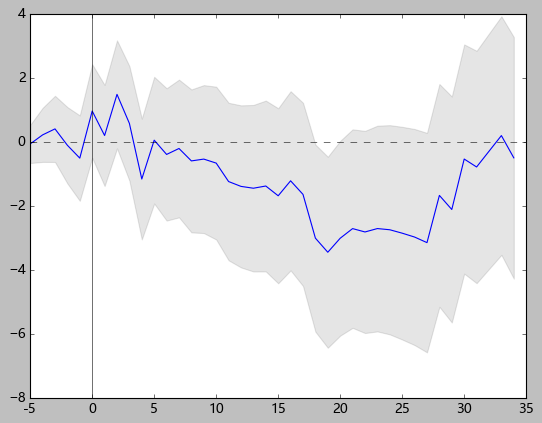

In [22]:
agg.plot()
plt.show()

In [23]:
outputpath= r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\China_Tran_CAAR_t_Test.csv' 
agg.results(decimals=[3,5,3,5,2,4]).to_csv(outputpath,sep=',',index='trading day',header=True) 
agg.results(decimals=[3,5,3,5,2,4])

,AAR,Variance AAR,CAAR,Variance CAAR,T-stat,P-value
-5,-0.074,0.21622,-0.074,0.21622,-0.16,0.4365
-4,0.282,0.21622,0.208,0.43244,0.32,0.3759
-3,0.188,0.21622,0.396,0.64866,0.49,0.3117
-2,-0.512,0.21622,-0.117,0.86487,-0.13,0.4502
-1,-0.401,0.21622,-0.518,1.08109,-0.50,0.3094
0,1.472,0.21622,0.955,1.29731,0.84,0.2012
1,-0.766,0.21622,0.188,1.51353,0.15,0.4392
2,1.287,0.21622,1.475,1.72975,1.12,0.1314
3,-0.908,0.21622,0.567,1.94597,0.41,0.3423
4,-1.738,0.21622,-1.171,2.16218,-0.80,0.2131


### $\textbf{Other countries}$

In [88]:
import ESM as es

es.Single.import_returns(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\USA_ESM_Data.csv')

COVID_U_T = es.Single.market_model(
    security_ticker = 'Retail',
    market_ticker = 'USA',
    event_date = np.datetime64('2020-03-13'),
    event_window = (-20,+34), 
    estimation_size = 160,
    buffer_size = 30
)

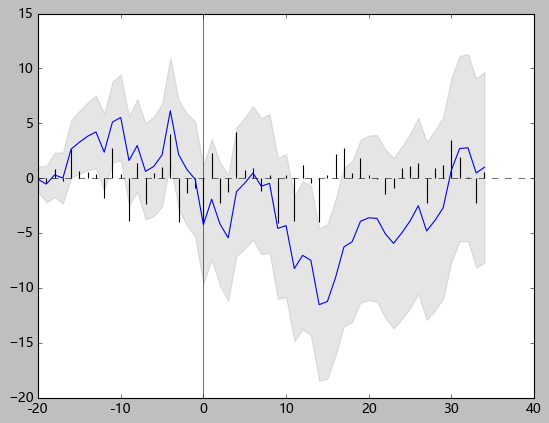

In [89]:
COVID_U_T.plot(AR=True)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_CAR_R.png')
plt.show()

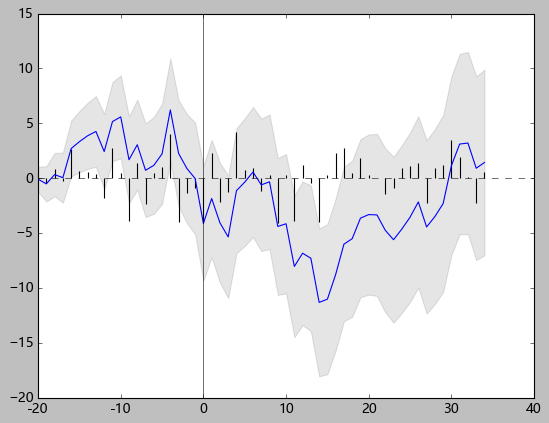

In [67]:
COVID_U_T.plot(AR=True)
plt.show()

In [71]:
outputpath= r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_Enter_t_Test.csv' 
COVID_U_T.results(decimals=[3,5,3,5,4,4]).to_csv(outputpath,sep=',',index='trading day',header=True) 

In [6]:
from scipy.stats import norm

df1 = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\USA_Test_Data.xlsx',sheet_name='USA_AR',header=0) 
df1.columns = ['trading_day','transportation','ratail','market','SAR_T','SAR_R','window']
data1 = df1.set_index('trading_day')

Adj_CAR = pd.DataFrame(index=data1.index)

window = data1.window.values
CAR_T = np.cumsum(data1.SAR_T.values) # 这个检验统计量SAR的计算在excel中完成
CAR_R = np.cumsum(data1.SAR_R.values)

normstat_T = CAR_T/np.sqrt(window)
normstat_R = CAR_R/np.sqrt(window)
pvalue_T = pd.DataFrame(1.0 - norm.cdf(abs(normstat_T), loc=0, scale=1), index=data1.index) # 检验统计量是标准正态分布 On corporate governance a study of proxy contests
pvalue_R = pd.DataFrame(1.0 - norm.cdf(abs(normstat_R), loc=0, scale=1), index=data1.index)
Tran_A_CAR = pd.DataFrame(normstat_T, index=data1.index)
Retail_A_CAR = pd.DataFrame(normstat_R,index=data1.index)

Adj_CAR['Tran_Adj_CAR'] = Tran_A_CAR
Adj_CAR['Tran_P'] = pvalue_T
Adj_CAR['Retail_Adj_CAR'] = Retail_A_CAR
Adj_CAR['Retail_P'] = pvalue_R
writer3 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\USA_Normal_Test.xlsx')
Adj_CAR.to_excel(writer3, 'USA_Adj_CAR')
writer3.save()
writer3.close()

In [94]:
import ESM as es

es.Single.import_returns(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Singapore_ESM_Data.csv')

COVID_S_T = es.Single.market_model(
    security_ticker = 'Entertainment',
    market_ticker = 'Singapore',
    event_date = np.datetime64('2020-02-07'),
    event_window = (-5,+34), 
    estimation_size = 160,
    buffer_size = 30
)

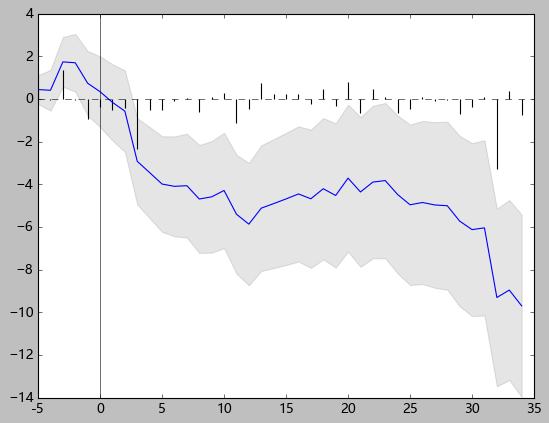

In [95]:
COVID_S_T.plot(AR=True)
plt.savefig(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_CAR_E.png')
plt.show()

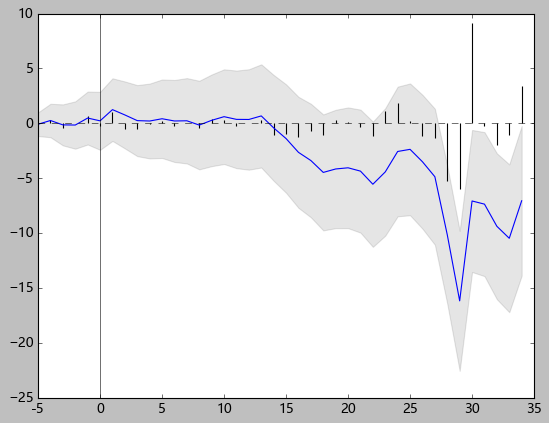

In [70]:
COVID_S_T.plot(AR=True)
plt.show()

In [96]:
outputpath= r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_Enter_t_Test.csv' 
COVID_S_T.results(decimals=[3,5,3,5,4,4]).to_csv(outputpath,sep=',',index='trading day',header=True) 

In [61]:
from scipy.stats import norm

df1 = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Singapore_Test_Data.xlsx',sheet_name='Singapore_AR',header=0) 
df1.columns = ['trading_day','transportation','ratail','market','SAR_T','SAR_R','window']
data1 = df1.set_index('trading_day')

Adj_CAR = pd.DataFrame(index=data1.index)

window = data1.window.values

CAR_T = np.cumsum(data1.SAR_T.values) # 这个检验统计量SAR的计算在excel中完成
CAR_R = np.cumsum(data1.SAR_R.values)

normstat_T = CAR_T/np.sqrt(window)
normstat_R = CAR_R/np.sqrt(window)
pvalue_T = pd.DataFrame(1.0 - norm.cdf(abs(normstat_T), loc=0, scale=1), index=data1.index) # 检验统计量是标准正态分布 On corporate governance a study of proxy contests
pvalue_R = pd.DataFrame(1.0 - norm.cdf(abs(normstat_R), loc=0, scale=1), index=data1.index)
Tran_A_CAR = pd.DataFrame(normstat_T, index=data1.index)
Retail_A_CAR = pd.DataFrame(normstat_R,index=data1.index)

Adj_CAR['Tran_Adj_CAR'] = Tran_A_CAR
Adj_CAR['Tran_P'] = pvalue_T
Adj_CAR['Retail_Adj_CAR'] = Retail_A_CAR
Adj_CAR['Retail_P'] = pvalue_R
writer3 = pd.ExcelWriter(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\Results\Singapore_Normal_Test.xlsx')
Adj_CAR.to_excel(writer3, 'Singapore_Adj_CAR')
writer3.save()
writer3.close()

# Model 2: Part 2

## Panel OLS $AR_{i,t}=\alpha + \beta_1 Log_case_{i,t}+ \beta_2 Return_{i,t} + \beta_3 ReturnM_{i,t} + FE + TE + \epsilon_{i,t}$

In [43]:
from linearmodels.panel import PanelOLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_excel(r'E:\Jupyter_Notebook\Modeling Competition_Master\Stock Market_ESM_PanelOLS\China_PanelOLS_Data.xlsx')
data = data.set_index(['indices','day'])
data.head()

dummy trading_day  month     AR  log_case    return   returnM  case  cure  death
indices             day                                                                                  
china_tansportation 0        1  2020-01-21      1 -0.149  5.003946 -1.826378 -1.723387   149     0      3
                    1        1  2020-01-22      1 -0.420  4.875197 -0.051570  0.427347   131     0      8
                    2        1  2020-01-23      1 -0.140  5.556828 -3.171558 -3.147572   259     6      8
                    3        1  2020-02-03      2 -1.765  8.081475 -9.609919 -8.208697  3234   155     64
                    4        1  2020-02-04      2 -3.181  8.265393 -0.743353  2.603305  3887   262     65

In [44]:
VIFs = pd.DataFrame()
VIFs["VIF Factor"] = [variance_inflation_factor(data[['return','returnM','case']].values, i)
                     for i in range(data[['return','returnM','case']].shape[1])] # 'cure','death'
VIFs

,VIF Factor
0,4.121161
1,4.120539
2,1.023148


In [45]:
data[['AR','case','cure','death']].corr(method='pearson')['AR']

AR       1.000000
case    -0.180411
cure     0.075779
death   -0.216932
Name: AR, dtype: float64

In [54]:
exog_vars = ['log_case','return','returnM']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.AR, exog, entity_effects=True)
FE_res = mod.fit(cov_type="unadjusted")
FE_res

Dep. Variable:,AR,R-squared:,0.9977
Estimator:,PanelOLS,R-squared (Between):,0.9985
No. Observations:,70,R-squared (Within):,0.9977
Date:,"Fri, Aug 14 2020",R-squared (Overall):,0.9977
Time:,14:17:01,Log-likelihood,109.39
Cov. Estimator:,Unadjusted,,
,,F-statistic:,9515.1
Entities:,2,P-value,0.0000
Avg Obs:,35.000,Distribution:,"F(3,65)"
Min Obs:,35.000,,
Max Obs:,35.000,F-statistic (robust):,9515.1


$\textbf{Checking residual is heteroskedastic}$

In [46]:
exog_vars = ['log_case','return','returnM']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.AR, exog, entity_effects=True)
FE_res = mod.fit(cov_type="clustered", cluster_entity=True)
FE_res

Dep. Variable:,AR,R-squared:,0.9977
Estimator:,PanelOLS,R-squared (Between):,0.9985
No. Observations:,70,R-squared (Within):,0.9977
Date:,"Fri, Aug 14 2020",R-squared (Overall):,0.9977
Time:,11:27:54,Log-likelihood,109.39
Cov. Estimator:,Clustered,,
,,F-statistic:,9515.1
Entities:,2,P-value,0.0000
Avg Obs:,35.000,Distribution:,"F(3,65)"
Min Obs:,35.000,,
Max Obs:,35.000,F-statistic (robust):,-2.121e+18


In [55]:
exog_vars = ['log_case','return','returnM']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.AR, exog, entity_effects=True)
FE_res = mod.fit(cov_type="robust")
FE_res

Dep. Variable:,AR,R-squared:,0.9977
Estimator:,PanelOLS,R-squared (Between):,0.9985
No. Observations:,70,R-squared (Within):,0.9977
Date:,"Fri, Aug 14 2020",R-squared (Overall):,0.9977
Time:,14:17:38,Log-likelihood,109.39
Cov. Estimator:,Robust,,
,,F-statistic:,9515.1
Entities:,2,P-value,0.0000
Avg Obs:,35.000,Distribution:,"F(3,65)"
Min Obs:,35.000,,
Max Obs:,35.000,F-statistic (robust):,4853.4


In [48]:
from linearmodels.panel import PooledOLS

exog_vars = ['dummy','log_case','return','returnM','month']
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.AR, exog)
Linear_res = mod.fit()
Linear_res

Dep. Variable:,AR,R-squared:,0.9978
Estimator:,PooledOLS,R-squared (Between):,1.0000
No. Observations:,70,R-squared (Within):,0.9977
Date:,"Fri, Aug 14 2020",R-squared (Overall):,0.9978
Time:,11:29:19,Log-likelihood,109.42
Cov. Estimator:,Unadjusted,,
,,F-statistic:,5713.6
Entities:,2,P-value,0.0000
Avg Obs:,35.000,Distribution:,"F(5,64)"
Min Obs:,35.000,,
Max Obs:,35.000,F-statistic (robust):,5713.6


In [37]:
from linearmodels.panel import compare
print(compare({"FE":FE_res,"Pooled":Linear_res}))

                  Model Comparison                  
                                   FE         Pooled
----------------------------------------------------
Dep. Variable                      AR             AR
Estimator                    PanelOLS      PooledOLS
No. Observations                   70             70
Cov. Est.                   Clustered     Unadjusted
R-squared                      0.9977         0.9978
R-Squared (Within)             0.9977         0.9977
R-Squared (Between)            0.9985         1.0000
R-Squared (Overall)            0.9977         0.9978
F-statistic                    9515.1         7246.3
P-value (F-stat)               0.0000         0.0000
=====================     ===========   ============
const                          0.0546         0.0596
                             (16.174)       (2.7891)
log_case                      -0.0008        -0.0008
                            (-2.1497)      (-0.2414)
return                         0.9919         